In [7]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
file_path = "LoanData.csv"
file_path_features = "features.csv" 
# Read the data into a pandas DataFrame
loan_data = pd.read_csv(file_path)
# Read the features from the CSV file
features = pd.read_csv(file_path_features, header=None).squeeze("columns")
filtered_loan_data1 = loan_data[features]
filtered_loan_data = filtered_loan_data1.copy()

/var/folders/tn/4ww1ljcj1tg4z0j08hx0ntz80000gn/T/ipykernel_47817/995188593.py:24: DtypeWarning: Columns (12,34,38,67,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(file_path)


In [8]:
filtered_loan_data['LoanDate'] = pd.to_datetime(filtered_loan_data['LoanDate'])
filtered_loan_data['DefaultDate'] = pd.to_datetime(filtered_loan_data['DefaultDate'])

# Calculate the time difference between 'DefaultDate' and 'LoanApplicationStartedDate'
filtered_loan_data['TimeDifference'] = (filtered_loan_data['DefaultDate'] - filtered_loan_data['LoanDate']).dt.days

# Create a new binary feature indicating if the time difference is less than 12 months
filtered_loan_data['DefaultWithin12Months'] = (filtered_loan_data['TimeDifference'] < 365) & ~filtered_loan_data['DefaultDate'].isnull()
# Drop the intermediate 'TimeDifference' column if not needed for further analysis
filtered_loan_data.drop(['TimeDifference', 'LoanApplicationStartedDate', 'DefaultDate'], axis=1, inplace=True) = filtered_loan_data1.copy()

In [9]:
nan_counts = filtered_loan_data.replace('nan', float('nan')).isna().sum()
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose column ColumnTransformer
froms_klwirn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import optuna
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seathout_nan = nan_counts[nan_counts / len(filtered_loan_data) <= 0.5].index.tolist()
filtered_loan_data_filtered = filtered_loan_data[columns_without_nan].drop('LoanDate', axis=1)

# Drop columns with more than 50% values as -1
filtered_loan_data_filtered = filtered_loan_data_filtered.loc[:, (filtered_loan_data_filtered != -1).mean() >= 0.1]
filtered_loan_data_filtered = filtered_loan_data_filtered.loc[:, (filtered_loan_data_filtered != 0).mean() >= 0.1]sampling import RandomOverSampler, SMOTE
from xgboot import XGBClssifier
iort optuna
from skearn.lear_model import LoisticRegression

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

file_path = "LoanData.csv"
file_path_features = "features.csv" 

# Read the data into a pandas DataFrame
loan_data = pd.read_csv(file_path)

# Read the features from the CSV file
features = pd.read_csv(file_path_features, header=None).squeeze("columns")

filtered_loan_data1 = loan_data[features]
filtered_loan_data = filtered_loan_data1.copy()
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
file_path = "LoanData.csv"
file_path_features = "features.csv" 
# Read the data into a pandas DataFrame
loan_data = pd.read_csv(file_path)
# Read the features from the CSV file
features = pd.read_csv(file_path_features, header=None).squeeze("columns")

,NewCreditCustomer,ApplicationSignedWeekday,LanguageCode,Age,Gender,Country,AppliedAmount,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,DefaultWithin12Months
0,False,6,1,27,1.0,EE,3189.0,-1,3.0,-1.0,-1.0,UpTo5Years,-1.0,10.0,900.0,0,0.00,1.0,3402.0,1161.57,False
1,False,4,4,35,1.0,FI,4146.0,-1,5.0,-1.0,-1.0,UpTo5Years,-1.0,1.0,3100.0,0,0.00,1.0,518.0,525.21,False
2,False,4,1,53,1.0,EE,2125.0,2,4.0,2.0,6.0,MoreThan5Years,1.0,1.0,354.0,8,485.09,1.0,500.0,590.95,False
3,False,3,4,43,0.0,FI,414.0,-1,3.0,-1.0,-1.0,Other,-1.0,3.0,1200.0,0,0.00,5.0,11198.0,1176.22,False
4,False,5,1,25,0.0,EE,531.0,-1,1.0,-1.0,-1.0,UpTo5Years,-1.0,1.0,947.0,0,0.00,8.0,8609.0,931.98,False


In [10]:

numerical_features = selector(dtype_exclude=object)(filtered_loan_data_filtered.drop('DefaultWithin12Months', axis=1))
categorical_features = ['NewCreditCustomer', 'ApplicationSignedWeekday', 'LanguageCode','EmploymentDurationCurrentEmployer', 'HomeOwnershipType', 'Education', 'Country']

filtered_loan_data_filtered[categorical_features] = filtered_loan_data_filtered[categorical_features].astype('object')


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

X = filtered_loan_data_filtered.drop(['DefaultWithin12Months'], axis=1)
y = filtered_loan_data_filtered['DefaultWithin12Months']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

X_train_resampled = preprocessor.fit_transform(X_train_resampled)
model = XGBClassifier(random_state=0)
model.fit(X_train_resampled, y_train_resampled)

X_test = preprocessor.transform(X_test)

# Perform five-fold cross-validation and calculate the AUC scores
auc_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Calculate the mean AUC score
mean_auc = auc_scores.mean()
print("Mean AUC:", mean_auc)

# Predict probabilities for the testing data
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# Calculate the classification report
report = classification_report(y_test, y_pred)
print(report)


Mean AUC: 0.8238854007716135
AUC: 0.793104647097562
              precision    recall  f1-score   support

       False       0.92      0.76      0.83     28409
        True       0.37      0.68      0.48      6079

    accuracy                           0.74     34488
   macro avg       0.65      0.72      0.66     34488
weighted avg       0.82      0.74      0.77     34488



In [11]:
from ydata_profiling import ProfileReport
ydata = filtered_loan_data_filtered.copy(deep=True)  # Replace filtered_loan_data_filtered with your actual data frame
profile = ProfileReport(ydata, title="Profiling Report")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

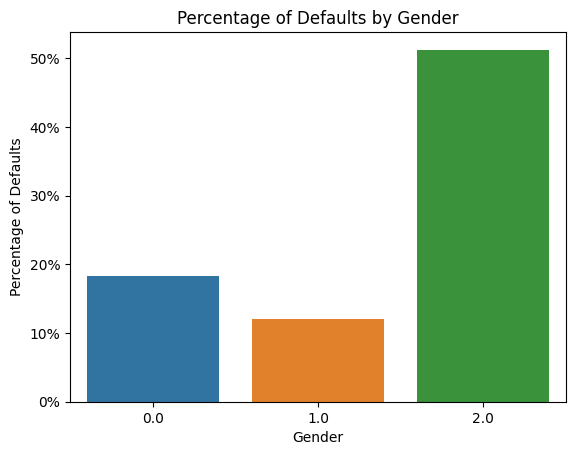

In [13]:
# Group the data by gender and count the number of default loans
default_counts = filtered_loan_data_filtered.groupby('Gender')['DefaultWithin12Months'].sum()
# Calculate the total number of loans by gender
total_counts = filtered_loan_data_filtered['Gender'].value_counts()

# Calculate the percentage of defaults by gender
default_percentages = (default_counts / total_counts) * 100

# Plot the percentage of defaults by gender
sns.barplot(x=default_percentages.index, y=default_percentages.values)
plt.xlabel('Gender')
plt.ylabel('Percentage of Defaults')
plt.title('Percentage of Defaults by Gender')

# Format the y-axis as percentages
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.show()

In [14]:
filtered_loan_data_filtered1 = filtered_loan_data[columns_without_nan]
nan_counts = filtered_loan_data1.replace('nan', float('nan')).isna().sum()
columns_without_nan = nan_counts[nan_counts / len(filtered_loan_data1) <= 0.5].index.tolist()

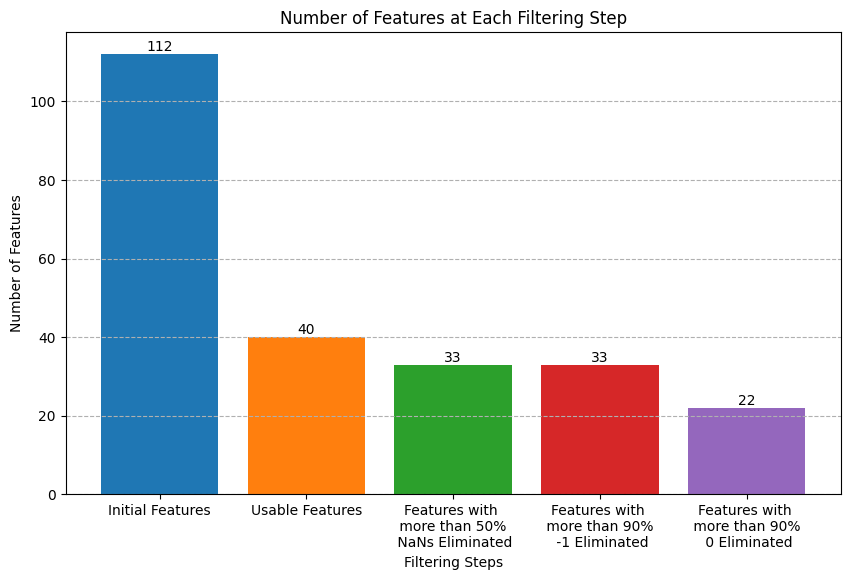

In [15]:
import matplotlib.pyplot as plt

# Define the filtering steps
filtering_steps = ['Initial Features', 
                   'Usable Features',
                   'Features with \n more than 50% \n NaNs Eliminated', 
                   'Features with \n more than 90% \n -1 Eliminated', 
                   'Features with \n more than 90% \n 0 Eliminated']
# Define the number of features at each filtering step
feature_counts = [len(loan_data.columns), 
                  len(features),
                  len(columns_without_nan), 
                  len(filtered_loan_data_filtered1.loc[:, (filtered_loan_data_filtered1 != -1).mean() >= 0.1].columns), 
                  len(filtered_loan_data_filtered1.loc[:, (filtered_loan_data_filtered1 != 0).mean() >= 0.1].columns)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the barplot with custom colors
plt.bar(filtering_steps, feature_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Set the x-axis label and rotate the x-axis labels for better visibility
plt.xlabel('Filtering Steps')
plt.xticks(rotation=0, ha='center')

# Set the y-axis label
plt.ylabel('Number of Features')

# Set the title
plt.title('Number of Features at Each Filtering Step')

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Add data labels to the bars
for i, count in enumerate(feature_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


/var/folders/tn/4ww1ljcj1tg4z0j08hx0ntz80000gn/T/ipykernel_47817/977052690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data1['LoanDate'] = pd.to_datetime(filtered_loan_data1['LoanDate'])
/var/folders/tn/4ww1ljcj1tg4z0j08hx0ntz80000gn/T/ipykernel_47817/977052690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_loan_data1['DefaultDate'] = pd.to_datetime(filtered_loan_data1['DefaultDate'])
/var/folders/tn/4ww1ljcj1tg4z0j08hx0ntz80000gn/T/ipykernel_47817/977052690.py:6: Setting

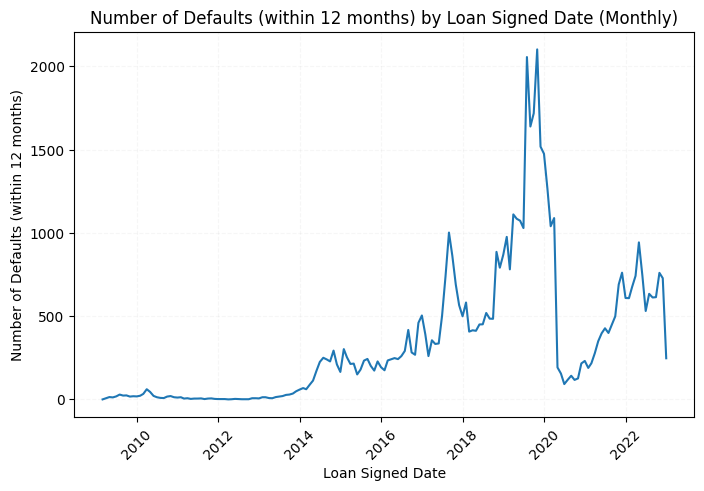

In [16]:
from datetime import datetime, timedelta
filtered_loan_data1['LoanDate'] = pd.to_datetime(filtered_loan_data1['LoanDate'])
filtered_loan_data1['DefaultDate'] = pd.to_datetime(filtered_loan_data1['DefaultDate'])

filtered_loan_data1['TimeDifference'] = (filtered_loan_data1['DefaultDate'] - filtered_loan_data1['LoanDate']).dt.days

# Filter out loans within the last 12 months as of today
today = datetime.now().date()
filtered_loan_data1 = filtered_loan_data1[filtered_loan_data1['LoanDate'] < pd.to_datetime(today - timedelta(days=365))]

# Create a new binary feature indicating if the time difference is less than 12 months
filtered_loan_data1['DefaultWithin12Months'] = (filtered_loan_data1['TimeDifference'] < 365) & ~filtered_loan_data1['DefaultDate'].isnull()

# Group the data by the signed date and count the number of defaults
defaults_by_date = filtered_loan_data1.groupby(pd.Grouper(key='LoanDate', freq='M'))['DefaultWithin12Months'].sum()
plt.figure(figsize=(8, 5))

# Create a line plot
plt.plot(defaults_by_date.index, defaults_by_date.values)
plt.xlabel('Loan Signed Date')
plt.ylabel('Number of Defaults (within 12 months)')
plt.title('Number of Defaults (within 12 months) by Loan Signed Date (Monthly)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.1)

# Display the plot
plt.show()


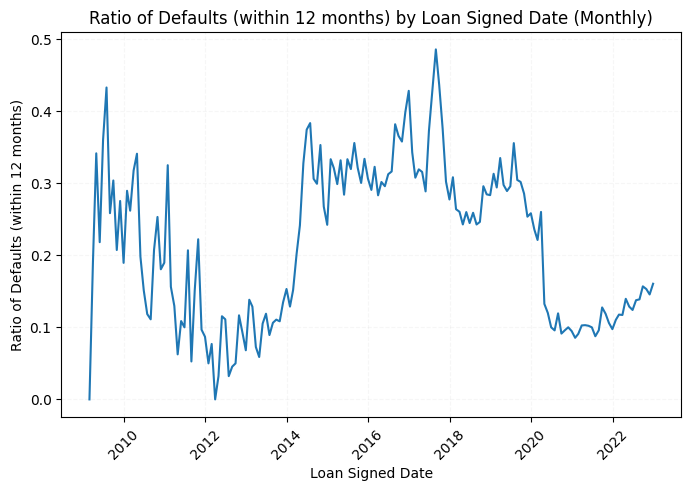

In [17]:
# Group the data by the signed date and count the number of defaults
defaults_by_date = filtered_loan_data1.groupby(pd.Grouper(key='LoanDate', freq='M'))['DefaultWithin12Months'].mean()
plt.figure(figsize=(8, 5))

# Create a line plot
plt.plot(defaults_by_date.index, defaults_by_date.values)
plt.xlabel('Loan Signed Date')
plt.ylabel('Ratio of Defaults (within 12 months)')
plt.title('Ratio of Defaults (within 12 months) by Loan Signed Date (Monthly)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.1)

# Display the plot
plt.show()
